**question1**: Explorer le jeu de données afin de bien comprendre ce qu'il contient. Donnez une définition de ce que contient chaque colonne. Créez un DataFrame nommée df qui contiendra les données que nous allons analyser dans les questions suivantes

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../bases de données pour les cours BIG DATA 3/hebergements_classes.csv", sep= ";")

In [3]:
df

,DATE DE CLASSEMENT,TYPOLOGIE ÉTABLISSEMENT,CLASSEMENT,CATÉGORIE,MENTION (villages de vacances),NOM COMMERCIAL,ADRESSE,CODE POSTAL,COMMUNE,SITE INTERNET,TYPE DE SÉJOUR,CAPACITÉ D'ACCUEIL (PERSONNES),NOMBRE DE CHAMBRES,NOMBRE D'EMPLACEMENTS,NOMBRE D'UNITES D'HABITATION (résidences de tourisme),NOMBRE DE LOGEMENTS (villages de vacances)
0,18/10/2018,HÔTEL DE TOURISME,4 étoiles,-,-,1872 STADIUM HÔTEL,Boulevard de Leningrad,76600,LE HAVRE,https://www.1872stadiumhotel.com/fr/,-,40,20,-,-,-
1,26/09/2019,HÔTEL DE TOURISME,2 étoiles,-,-,3B HÔTEL DE BORDEAUX,66 avenue de la Libération,33440,AMBARÈS-ET-LAGRAVE,https://www.hotel-restaurant-gironde.fr/,-,26,14,-,-,-
2,12/06/2017,HÔTEL DE TOURISME,4 étoiles,-,-,5 TERRES HÔTEL & SPA MGALLERY BY SOFITEL,11 Place de l'Hôtel de ville,67140,BARR,https://5terres-hotel.fr/fr/,-,56,27,-,-,-
3,22/09/2017,HÔTEL DE TOURISME,4 étoiles,-,-,7HÔTEL&SPA,550 Boulevard Sébastien Brandt,67400,ILLKIRCH-GRAFFENSTADEN,https://7hotel.fr/,-,312,139,-,-,-
4,29/11/2019,HÔTEL DE TOURISME,3 étoiles,-,-,9 HÔTEL BASTILLE LYON,23 rue de lyon,75012,PARIS,https://www.9-hotel-bastille-lyon.fr,-,90,48,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21321,26/10/2017,CAMPING,1 étoile,TOURISME,-,ÉCO-CAMPING DE LA FRÊNAIE,1 chemin du Camping,17170,LA GRÈVE-SUR-MIGNON,http://lafrenaie.org/eco-camping-nature-marais...,-,160,-,80,-,-
21322,06/07/2017,CAMPING,2 étoiles,TOURISME,-,ÉCO-CAMPING DES BUIS,La Basse Bouère,35330,LES BRULAIS,http://www.tourismebretagne.com/sejourner/camp...,-,112,-,28,-,-
21323,17/06/2016,CAMPING,4 étoiles,TOURISME,-,ÉCOÉTANG CAMPING SALLE GÎTES DE L'ÉTANG,603 impasse du Domaine de l'Etang,49320,BRISSAC-QUINCÉ,http://www.campingetang.com,-,500,-,152,-,-
21324,05/03/2018,HÔTEL DE TOURISME,4 étoiles,-,-,ÉLÉGANCE SUITES HÔTEL,56 avenue du Pas des Boeufs,17580,LE BOIS-PLAGE-EN-RÉ,www.elegancehotel-iledere.com,-,16,8,-,-,-


#### On voit dans de dataframe des établissements touristiques avec des caractéristiques qui leurs sont associées comme le nombre d'étoiles la catégorie ou encore le nombre de personnes qui l'on peut accueillir dans chaque établissement , on observe aussi qu'il y a beaucoup de réponses manquantes dans certaines des colonnes du df et enfin on retrouve la localisation de ces établissements en exécutant la commande df[" nom_de_la_colonne "] pour chaque colonne on voit que toutes les colonnes sont de type "objet" y compris les colonnes comme le code postal qui contiennent des chiffres, on voit aussi que le df contient 21326 lignes et 16 colonnes

**question2** : Trouvez le top 3 des codes postaux qui acceuillent le plus d'établissements. Donnez une explication aux résultats trouvés ##

In [4]:
df.value_counts("CODE POSTAL", ascending = False)

CODE POSTAL
75009    168
75008    150
65100    127
75017    114
75015     99
        ... 
53120      1
52410      1
52360      1
52250      1
47430      1
Length: 3917, dtype: int64

#### le top 3 des codes postaux qui accueillent le plus d'établissement sont le 75009, 75008 et 65100 donc Paris classée parmis les plus belles villes du monde et Lourdes pour son site de pèlerinage catholique et ses miracles 

 **Question 3** : Calculez la capacité d'accueil moyenne des hotels français pour chaque niveau d'étoiles (colonne CLASSEMENT) 

In [5]:
df["CAPACITÉ D'ACCUEIL (PERSONNES)"] = pd.to_numeric(df["CAPACITÉ D'ACCUEIL (PERSONNES)"], errors = 'coerce')
# on convertie la colonne en type numérique pour pouvoir effectuer un calcul de moyenne , on utilise errors
# = coerce pour que lorsqu'une ligne est vide ou NaN on puisse quand même utiliser la colonne en mode numérique

In [6]:
import numpy as np
df.groupby("CLASSEMENT")["CAPACITÉ D'ACCUEIL (PERSONNES)"].mean()

CLASSEMENT
1 étoile          171.560494
2 étoiles         154.261817
3 étoiles         209.081604
4 étoiles         393.954748
5 étoiles         585.425470
Aire naturelle     80.948718
Name: CAPACITÉ D'ACCUEIL (PERSONNES), dtype: float64

#### On voit que la plus grande capacité moyenne d'accueil pour les hôtels Français est aux 5 étoiles , probablement parceque beaucoup des 5 étoiles se trouvent à Paris et en haute saison les touriste étrangers fortunés ne veulent pas se priver lors de leur voyage dans la capitale et optent pour le luxe du 5 étoiles

**question4** : Quel est le département le plus dense en établissements ?

In [7]:
df["DEPARTEMENT"] = df["CODE POSTAL"].apply(lambda x: x[0:2])
# grâce à une fonction lambda on demande à isoler les seuls 2 premiers chiffres
# du code postal , et on met ce résultat dans une colonne que l'on crée qui s'appelle "département"

In [8]:
df["DEPARTEMENT"].value_counts(sort=True, ascending= False)
# on regroupe par département et on trie pour afficher le résultat dans un ordre décroissant 

75    1477
73     681
20     640
06     631
83     631
      ... 
23      30
70      23
90      20
98       6
-        1
Name: DEPARTEMENT, Length: 98, dtype: int64

#### On affiche les 3 départements les plus denses, le 75,73 et le 20, ce qui n'est pas surprenant, Paris étant la capitale et une des plus belles villes du monde et la Corse représente l'île de beauté . 

In [9]:
df.loc[df["CODE POSTAL"] == 75009, "ADRESSE"]

Series([], Name: ADRESSE, dtype: object)

In [10]:
df["CODE POSTAL"]

0        76600
1        33440
2        67140
3        67400
4        75012
         ...  
21321    17170
21322    35330
21323    49320
21324    17580
21325    40100
Name: CODE POSTAL, Length: 21326, dtype: object

In [11]:
df.value_counts("CODE POSTAL", ascending = False)
# C'est en Ile de France qu'on trouve le + d'établissements

CODE POSTAL
75009    168
75008    150
65100    127
75017    114
75015     99
        ... 
53120      1
52410      1
52360      1
52250      1
47430      1
Length: 3917, dtype: int64

In [12]:
df["code_postal"] = df["CODE POSTAL"]
# ici je renomme la colonne CODE POSTAL en code_postal pour me simplifier la vie lors de la fusion
# de 2 dataframes un peu plus loin dans la question 5

In [13]:
df.drop("CODE POSTAL", axis = 1)
# je supprime l'ancienne colonne CODE POSTAL que j'ai remplacée

,DATE DE CLASSEMENT,TYPOLOGIE ÉTABLISSEMENT,CLASSEMENT,CATÉGORIE,MENTION (villages de vacances),NOM COMMERCIAL,ADRESSE,COMMUNE,SITE INTERNET,TYPE DE SÉJOUR,CAPACITÉ D'ACCUEIL (PERSONNES),NOMBRE DE CHAMBRES,NOMBRE D'EMPLACEMENTS,NOMBRE D'UNITES D'HABITATION (résidences de tourisme),NOMBRE DE LOGEMENTS (villages de vacances),DEPARTEMENT,code_postal
0,18/10/2018,HÔTEL DE TOURISME,4 étoiles,-,-,1872 STADIUM HÔTEL,Boulevard de Leningrad,LE HAVRE,https://www.1872stadiumhotel.com/fr/,-,40.0,20,-,-,-,76,76600
1,26/09/2019,HÔTEL DE TOURISME,2 étoiles,-,-,3B HÔTEL DE BORDEAUX,66 avenue de la Libération,AMBARÈS-ET-LAGRAVE,https://www.hotel-restaurant-gironde.fr/,-,26.0,14,-,-,-,33,33440
2,12/06/2017,HÔTEL DE TOURISME,4 étoiles,-,-,5 TERRES HÔTEL & SPA MGALLERY BY SOFITEL,11 Place de l'Hôtel de ville,BARR,https://5terres-hotel.fr/fr/,-,56.0,27,-,-,-,67,67140
3,22/09/2017,HÔTEL DE TOURISME,4 étoiles,-,-,7HÔTEL&SPA,550 Boulevard Sébastien Brandt,ILLKIRCH-GRAFFENSTADEN,https://7hotel.fr/,-,312.0,139,-,-,-,67,67400
4,29/11/2019,HÔTEL DE TOURISME,3 étoiles,-,-,9 HÔTEL BASTILLE LYON,23 rue de lyon,PARIS,https://www.9-hotel-bastille-lyon.fr,-,90.0,48,-,-,-,75,75012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21321,26/10/2017,CAMPING,1 étoile,TOURISME,-,ÉCO-CAMPING DE LA FRÊNAIE,1 chemin du Camping,LA GRÈVE-SUR-MIGNON,http://lafrenaie.org/eco-camping-nature-marais...,-,160.0,-,80,-,-,17,17170
21322,06/07/2017,CAMPING,2 étoiles,TOURISME,-,ÉCO-CAMPING DES BUIS,La Basse Bouère,LES BRULAIS,http://www.tourismebretagne.com/sejourner/camp...,-,112.0,-,28,-,-,35,35330
21323,17/06/2016,CAMPING,4 étoiles,TOURISME,-,ÉCOÉTANG CAMPING SALLE GÎTES DE L'ÉTANG,603 impasse du Domaine de l'Etang,BRISSAC-QUINCÉ,http://www.campingetang.com,-,500.0,-,152,-,-,49,49320
21324,05/03/2018,HÔTEL DE TOURISME,4 étoiles,-,-,ÉLÉGANCE SUITES HÔTEL,56 avenue du Pas des Boeufs,LE BOIS-PLAGE-EN-RÉ,www.elegancehotel-iledere.com,-,16.0,8,-,-,-,17,17580


**Question 5** : Créer un chroroplèthe de la France en affichant en nuancier de couleurs le nombre de campings par région par Française  

**5.1** : trouvez un dataset sur internet liant les codes postaux Français aux 18 régions, téléchargez-le et chargez le dans une DataFrame 

In [14]:
df_code = pd.read_csv("communes-departement-region.csv")

In [15]:
df

,DATE DE CLASSEMENT,TYPOLOGIE ÉTABLISSEMENT,CLASSEMENT,CATÉGORIE,MENTION (villages de vacances),NOM COMMERCIAL,ADRESSE,CODE POSTAL,COMMUNE,SITE INTERNET,TYPE DE SÉJOUR,CAPACITÉ D'ACCUEIL (PERSONNES),NOMBRE DE CHAMBRES,NOMBRE D'EMPLACEMENTS,NOMBRE D'UNITES D'HABITATION (résidences de tourisme),NOMBRE DE LOGEMENTS (villages de vacances),DEPARTEMENT,code_postal
0,18/10/2018,HÔTEL DE TOURISME,4 étoiles,-,-,1872 STADIUM HÔTEL,Boulevard de Leningrad,76600,LE HAVRE,https://www.1872stadiumhotel.com/fr/,-,40.0,20,-,-,-,76,76600
1,26/09/2019,HÔTEL DE TOURISME,2 étoiles,-,-,3B HÔTEL DE BORDEAUX,66 avenue de la Libération,33440,AMBARÈS-ET-LAGRAVE,https://www.hotel-restaurant-gironde.fr/,-,26.0,14,-,-,-,33,33440
2,12/06/2017,HÔTEL DE TOURISME,4 étoiles,-,-,5 TERRES HÔTEL & SPA MGALLERY BY SOFITEL,11 Place de l'Hôtel de ville,67140,BARR,https://5terres-hotel.fr/fr/,-,56.0,27,-,-,-,67,67140
3,22/09/2017,HÔTEL DE TOURISME,4 étoiles,-,-,7HÔTEL&SPA,550 Boulevard Sébastien Brandt,67400,ILLKIRCH-GRAFFENSTADEN,https://7hotel.fr/,-,312.0,139,-,-,-,67,67400
4,29/11/2019,HÔTEL DE TOURISME,3 étoiles,-,-,9 HÔTEL BASTILLE LYON,23 rue de lyon,75012,PARIS,https://www.9-hotel-bastille-lyon.fr,-,90.0,48,-,-,-,75,75012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21321,26/10/2017,CAMPING,1 étoile,TOURISME,-,ÉCO-CAMPING DE LA FRÊNAIE,1 chemin du Camping,17170,LA GRÈVE-SUR-MIGNON,http://lafrenaie.org/eco-camping-nature-marais...,-,160.0,-,80,-,-,17,17170
21322,06/07/2017,CAMPING,2 étoiles,TOURISME,-,ÉCO-CAMPING DES BUIS,La Basse Bouère,35330,LES BRULAIS,http://www.tourismebretagne.com/sejourner/camp...,-,112.0,-,28,-,-,35,35330
21323,17/06/2016,CAMPING,4 étoiles,TOURISME,-,ÉCOÉTANG CAMPING SALLE GÎTES DE L'ÉTANG,603 impasse du Domaine de l'Etang,49320,BRISSAC-QUINCÉ,http://www.campingetang.com,-,500.0,-,152,-,-,49,49320
21324,05/03/2018,HÔTEL DE TOURISME,4 étoiles,-,-,ÉLÉGANCE SUITES HÔTEL,56 avenue du Pas des Boeufs,17580,LE BOIS-PLAGE-EN-RÉ,www.elegancehotel-iledere.com,-,16.0,8,-,-,-,17,17580


In [16]:
# j'ai 14 codes régions qui apparaissent
df_code.groupby("code_region").count()

,code_commune_INSEE,nom_commune_postal,code_postal,libelle_acheminement,ligne_5,latitude,longitude,code_commune,article,nom_commune,nom_commune_complet,code_departement,nom_departement,nom_region
code_region,,,,,,,,,,,,,,
1.0,38,38,38,38,5,38,38,38,5,38,38,38,38,38
2.0,38,38,38,38,3,38,38,38,17,38,38,38,38,38
3.0,25,25,25,25,3,25,25,25,0,25,25,25,25,25
4.0,85,85,85,85,61,85,85,85,19,85,85,85,85,85
6.0,23,23,23,23,6,23,23,23,0,23,23,23,23,23
11.0,1383,1383,1383,1383,82,1383,1383,1383,102,1383,1383,1383,1383,1383
24.0,1892,1892,1892,1892,84,1892,1892,1892,141,1892,1892,1892,1892,1892
27.0,4031,4031,4031,4031,262,4031,4031,4031,243,4031,4031,4031,4031,4031
28.0,3376,3376,3376,3376,527,3375,3375,3376,399,3376,3376,3376,3376,3376


In [17]:
df_code.dropna(inplace=True)
# on aperçoit beaucoup de NaN dans le datasetdonc je supprime ces valeurs

In [18]:
df.dropna(inplace=True)
# j'en profite pour nettoyer le df initial

In [19]:
df_code
# le dataset une fois nettoyé contient 276 lignes

,code_commune_INSEE,nom_commune_postal,code_postal,libelle_acheminement,ligne_5,latitude,longitude,code_commune,article,nom_commune,nom_commune_complet,code_departement,nom_departement,code_region,nom_region
208,1204,LE POIZAT LALLEYRIAT,1130,LE POIZAT LALLEYRIAT,LE POIZAT,46.147959,5.718292,204.0,Le,Poizat-Lalleyriat,Le Poizat-Lalleyriat,1,Ain,84.0,Auvergne-Rhône-Alpes
760,2307,LA FERTE MILON,2460,LA FERTE MILON,MOSLOY,49.175987,3.142376,307.0,La,Ferté-Milon,La Ferté-Milon,2,Aisne,32.0,Hauts-de-France
886,2439,LES SEPTVALLONS,2160,LES SEPTVALLONS,BARBONVAL,49.360336,3.655678,439.0,Les,Septvallons,Les Septvallons,2,Aisne,32.0,Hauts-de-France
887,2439,LES SEPTVALLONS,2160,LES SEPTVALLONS,GLENNES,49.360336,3.655678,439.0,Les,Septvallons,Les Septvallons,2,Aisne,32.0,Hauts-de-France
888,2439,LES SEPTVALLONS,2160,LES SEPTVALLONS,LONGUEVAL BARBONVAL,49.360336,3.655678,439.0,Les,Septvallons,Les Septvallons,2,Aisne,32.0,Hauts-de-France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38902,97422,LE TAMPON,97418,LE TAMPON,LA PLAINE DES CAFRES,-21.223275,55.558488,22.0,Le,Tampon,Le Tampon,974,La Réunion,4.0,La Réunion
38903,97422,LE TAMPON,97418,LE TAMPON,TAMPON 17EME KM,-21.223275,55.558488,22.0,Le,Tampon,Le Tampon,974,La Réunion,4.0,La Réunion
38905,97422,LE TAMPON,97430,LE TAMPON,LES TROIS MARES,-21.223275,55.558488,22.0,Le,Tampon,Le Tampon,974,La Réunion,4.0,La Réunion
38906,97422,LE TAMPON,97430,LE TAMPON,PONT D YVES,-21.223275,55.558488,22.0,Le,Tampon,Le Tampon,974,La Réunion,4.0,La Réunion


In [20]:
df_code["code_region"]

208      84.0
760      32.0
886      32.0
887      32.0
888      32.0
         ... 
38902     4.0
38903     4.0
38905     4.0
38906     4.0
38907     4.0
Name: code_region, Length: 276, dtype: float64

**5.2** : Créez une colonne "region" qui contient le numéro de la région qui correspond à la ligne 
et un colonne "region_name" avec le nom de la région

In [21]:
df_code["code_postal"] = df_code["code_postal"].astype(str)
#### après avoir vu que la colonne code_postal est de type int je l'a convertie 
#### en type object pour pouvoir faire une fusion du df avec df_code afin que les colonnes
#### code_postal de chaque df soient du même type 

In [22]:
df_fusion1 = df.merge(df_code, how= "inner", on = "code_postal")

df.merge(df_code, left_on="code_postal", right_on="code_postal")

df_ok = df.merge(df_code, left_on="code_postal", right_on="code_postal", how="inner")

In [23]:
df_fusion1["REGION"] = df_fusion1["code_region"]
df_fusion1["REGION_NAME"] = df_fusion1["nom_region"]
df_fusion1["REGION_NAME"]

0               Nouvelle-Aquitaine
1               Nouvelle-Aquitaine
2               Nouvelle-Aquitaine
3               Nouvelle-Aquitaine
4               Nouvelle-Aquitaine
                   ...            
1264                     Normandie
1265    Provence-Alpes-Côte d'Azur
1266    Provence-Alpes-Côte d'Azur
1267       Bourgogne-Franche-Comté
1268       Bourgogne-Franche-Comté
Name: REGION_NAME, Length: 1269, dtype: object

In [24]:
pip install pandas

In [25]:
import pandas as pd
import geopandas as gpd

In [26]:
france = gpd.read_file("regions.geojson")

In [27]:
france["REGION"] = france["code"]
france["REGION_NAME"] = france["nom"]
france

,code,nom,geometry,REGION,REGION_NAME
0,11,Île-de-France,"POLYGON ((1.92215 48.45760, 1.92074 48.44775, ...",11,Île-de-France
1,24,Centre-Val de Loire,"POLYGON ((0.81482 48.67016, 0.82767 48.68072, ...",24,Centre-Val de Loire
2,27,Bourgogne-Franche-Comté,"POLYGON ((6.94054 47.43337, 6.94168 47.41580, ...",27,Bourgogne-Franche-Comté
3,28,Normandie,"POLYGON ((-1.11962 49.35557, -1.11503 49.36240...",28,Normandie
4,32,Hauts-de-France,"POLYGON ((4.14089 49.97876, 4.15398 49.97484, ...",32,Hauts-de-France
5,44,Grand Est,"POLYGON ((3.41479 48.39027, 3.42208 48.41334, ...",44,Grand Est
6,52,Pays de la Loire,"MULTIPOLYGON (((-2.30479 46.70942, -2.28612 46...",52,Pays de la Loire
7,53,Bretagne,"MULTIPOLYGON (((-2.12371 48.60441, -2.13448 48...",53,Bretagne
8,75,Nouvelle-Aquitaine,"MULTIPOLYGON (((-1.02574 45.57469, -0.99300 45...",75,Nouvelle-Aquitaine
9,01,Guadeloupe,"MULTIPOLYGON (((-61.63356 15.83977, -61.64798 ...",01,Guadeloupe


In [28]:
france.drop("nom", axis = 1, inplace = True)

In [29]:
france.drop("code", axis = 1, inplace = True)

In [30]:
france
# j'ai arrangé mon dataframe "france" pour que les colonnes soient nommées comme dans le précédent data frame
# pour réaliser une fusion des df

,geometry,REGION,REGION_NAME
0,"POLYGON ((1.92215 48.45760, 1.92074 48.44775, ...",11,Île-de-France
1,"POLYGON ((0.81482 48.67016, 0.82767 48.68072, ...",24,Centre-Val de Loire
2,"POLYGON ((6.94054 47.43337, 6.94168 47.41580, ...",27,Bourgogne-Franche-Comté
3,"POLYGON ((-1.11962 49.35557, -1.11503 49.36240...",28,Normandie
4,"POLYGON ((4.14089 49.97876, 4.15398 49.97484, ...",32,Hauts-de-France
5,"POLYGON ((3.41479 48.39027, 3.42208 48.41334, ...",44,Grand Est
6,"MULTIPOLYGON (((-2.30479 46.70942, -2.28612 46...",52,Pays de la Loire
7,"MULTIPOLYGON (((-2.12371 48.60441, -2.13448 48...",53,Bretagne
8,"MULTIPOLYGON (((-1.02574 45.57469, -0.99300 45...",75,Nouvelle-Aquitaine
9,"MULTIPOLYGON (((-61.63356 15.83977, -61.64798 ...",01,Guadeloupe


In [31]:
france.set_index("REGION")
france["REGION"]

0     11
1     24
2     27
3     28
4     32
5     44
6     52
7     53
8     75
9     01
10    02
11    03
12    04
13    06
14    76
15    84
16    93
17    94
Name: REGION, dtype: object

In [32]:
df_fusion1["REGION"] = df_fusion1["REGION"].astype(str)

<AxesSubplot:>

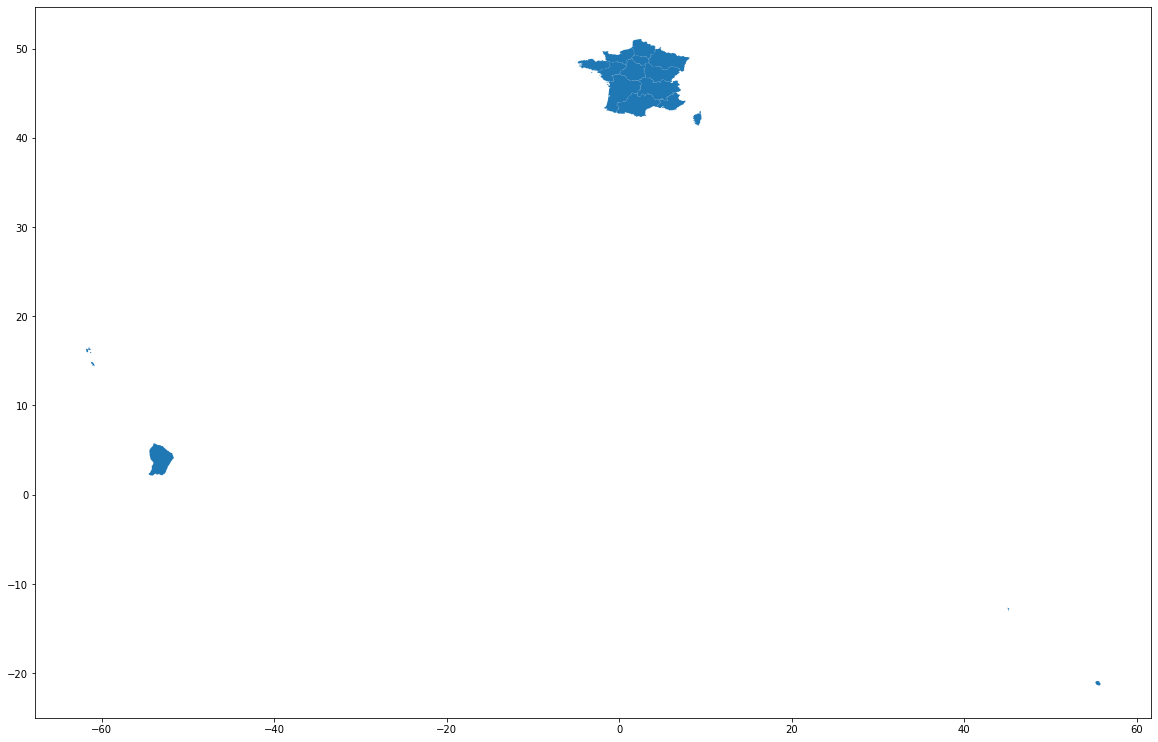

In [33]:
france.plot(figsize = (20,20))

In [34]:
france_metropolitaine = france.drop([9,10,11,12,13,17])

In [35]:
france_metropolitaine

,geometry,REGION,REGION_NAME
0,"POLYGON ((1.92215 48.45760, 1.92074 48.44775, ...",11,Île-de-France
1,"POLYGON ((0.81482 48.67016, 0.82767 48.68072, ...",24,Centre-Val de Loire
2,"POLYGON ((6.94054 47.43337, 6.94168 47.41580, ...",27,Bourgogne-Franche-Comté
3,"POLYGON ((-1.11962 49.35557, -1.11503 49.36240...",28,Normandie
4,"POLYGON ((4.14089 49.97876, 4.15398 49.97484, ...",32,Hauts-de-France
5,"POLYGON ((3.41479 48.39027, 3.42208 48.41334, ...",44,Grand Est
6,"MULTIPOLYGON (((-2.30479 46.70942, -2.28612 46...",52,Pays de la Loire
7,"MULTIPOLYGON (((-2.12371 48.60441, -2.13448 48...",53,Bretagne
8,"MULTIPOLYGON (((-1.02574 45.57469, -0.99300 45...",75,Nouvelle-Aquitaine
14,"MULTIPOLYGON (((1.78613 42.57362, 1.78094 42.5...",76,Occitanie


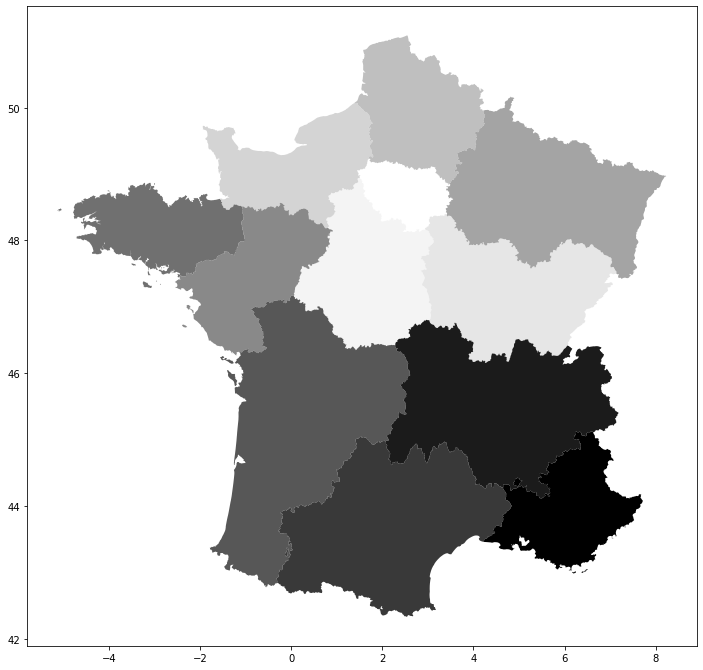

In [36]:
import matplotlib.pyplot as plt
france_metropolitaine.plot(cmap = "Greys", figsize = (12,12))
# winter
# Greys
plt.savefig("choroplethe_france.jpeg")
# je plot seulement un graphe de la France et ses régions car je n'ai pas réussi à faire la dernière fusion 
# des tableaux df_fusion1 et france correctement , la fusion fonctionne mais mon dataframe
# n'a aucune ligne 

In [37]:
from geopy import geocoders
from geopy import distance
import numpy as np

df_code.set_index("code_postal", inplace = True)

In [38]:
df_code.loc[df_code["code_region"]==4.0, "nom_region"]

38827    La Réunion
38832    La Réunion
38837    La Réunion
38838    La Réunion
38840    La Réunion
38841    La Réunion
38842    La Réunion
38902    La Réunion
38903    La Réunion
38905    La Réunion
38906    La Réunion
38907    La Réunion
Name: nom_region, dtype: object

In [60]:
values=["1 étoile", "2 étoiles", "3 étoiles", "Aire naturelle"]
filtered_df = df[~df.CLASSEMENT.isin(values)]
print(filtered_df)

      DATE DE CLASSEMENT TYPOLOGIE ÉTABLISSEMENT CLASSEMENT CATÉGORIE  \
0             18/10/2018       HÔTEL DE TOURISME  4 étoiles         -   
2             12/06/2017       HÔTEL DE TOURISME  4 étoiles         -   
3             22/09/2017       HÔTEL DE TOURISME  4 étoiles         -   
7             21/12/2015       HÔTEL DE TOURISME  4 étoiles         -   
8             31/10/2017       HÔTEL DE TOURISME  4 étoiles         -   
...                  ...                     ...        ...       ...   
21311         25/02/2016       HÔTEL DE TOURISME  4 étoiles         -   
21313         07/07/2017       HÔTEL DE TOURISME  4 étoiles         -   
21317         12/04/2016   RÉSIDENCE DE TOURISME  4 étoiles         -   
21323         17/06/2016                 CAMPING  4 étoiles  TOURISME   
21324         05/03/2018       HÔTEL DE TOURISME  4 étoiles         -   

      MENTION (villages de vacances)  \
0                                  -   
2                                  -   
3  

**question 6** : Dans cette question nous allons trouver tous les établissements à 4 ou 5 étoiles qui se trouvent à maximum 50 kms de Clermont-Ferrand

In [39]:
from geopy.geocoders import Nominatim 
from geopy.distance import geodesic

In [40]:
# coordonnées gps de Clermont-Ferrand 45.7797   3.0869445

In [41]:
from math import*

In [42]:
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from geopy import distance
import numpy as np
import pandas as pd

In [43]:
import geopandas as gdp

In [61]:
values=["1 étoile", "2 étoiles", "3 étoiles", "Aire naturelle"]
filtered_df = df[~df.CLASSEMENT.isin(values)]
filtered_df

,DATE DE CLASSEMENT,TYPOLOGIE ÉTABLISSEMENT,CLASSEMENT,CATÉGORIE,MENTION (villages de vacances),NOM COMMERCIAL,ADRESSE,CODE POSTAL,COMMUNE,SITE INTERNET,TYPE DE SÉJOUR,CAPACITÉ D'ACCUEIL (PERSONNES),NOMBRE DE CHAMBRES,NOMBRE D'EMPLACEMENTS,NOMBRE D'UNITES D'HABITATION (résidences de tourisme),NOMBRE DE LOGEMENTS (villages de vacances),DEPARTEMENT,code_postal
0,18/10/2018,HÔTEL DE TOURISME,4 étoiles,-,-,1872 STADIUM HÔTEL,Boulevard de Leningrad,76600,LE HAVRE,https://www.1872stadiumhotel.com/fr/,-,40.0,20,-,-,-,76,76600
2,12/06/2017,HÔTEL DE TOURISME,4 étoiles,-,-,5 TERRES HÔTEL & SPA MGALLERY BY SOFITEL,11 Place de l'Hôtel de ville,67140,BARR,https://5terres-hotel.fr/fr/,-,56.0,27,-,-,-,67,67140
3,22/09/2017,HÔTEL DE TOURISME,4 étoiles,-,-,7HÔTEL&SPA,550 Boulevard Sébastien Brandt,67400,ILLKIRCH-GRAFFENSTADEN,https://7hotel.fr/,-,312.0,139,-,-,-,67,67400
7,21/12/2015,HÔTEL DE TOURISME,4 étoiles,-,-,9HÔTEL RÉPUBLIQUE,7/9 Rue Pierre Chausson,75010,PARIS,http://www.le9hotel.com/fr/h/9-hotel-republique,-,92.0,48,-,-,-,75,75010
8,31/10/2017,HÔTEL DE TOURISME,4 étoiles,-,-,ABBAYE DE SAINTE CROIX,route du Val de Cuech,13300,SALON-DE-PROVENCE,http://www.abbaye-de-saintecroix.fr/,-,61.0,25,-,-,-,13,13300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21311,25/02/2016,HÔTEL DE TOURISME,4 étoiles,-,-,WESTOTEL NANTES ATLANTIQUE,34 rue de la vrière,44240,LA CHAPELLE-SUR-ERDRE,http://www.westotel.com,-,606.0,303,-,-,-,44,44240
21313,07/07/2017,HÔTEL DE TOURISME,4 étoiles,-,-,XO HÔTEL PARIS,23/25 RUE THÉODORE DE BANVILLE,75017,PARIS,www.xohotelparis.com,-,119.0,58,-,-,-,75,75017
21317,12/04/2016,RÉSIDENCE DE TOURISME,4 étoiles,-,-,ZENITUDE DIVONNE CONFORT,522 AVENUE MARCEL ANTHONIOZ,01220,DIVONNE-LES-BAINS,https://www.zenitude-hotel-residences.com/fr_F...,-,238.0,-,-,71,-,01,01220
21323,17/06/2016,CAMPING,4 étoiles,TOURISME,-,ÉCOÉTANG CAMPING SALLE GÎTES DE L'ÉTANG,603 impasse du Domaine de l'Etang,49320,BRISSAC-QUINCÉ,http://www.campingetang.com,-,500.0,-,152,-,-,49,49320


**6.1** Créez 2 nouvelles colonnes LATITUDE et LONGITUDE qui contiennent pour chaque ligne la latitude et la longitude de l'établissement grâce à GEOPY

In [131]:
geocoder = RateLimiter(Nominatim(user_agent='tutorial').geocode, min_delay_seconds=1)

In [ ]:
filtered_df["location"] = filtered_df["ADRESSE"].apply(geocoder)

RateLimiter caught an error, retrying (0/2 tries). Called with (*('2 grande rue',), **{}).
Traceback (most recent call last):
  File "C:\Users\six_h\miniconda3\lib\site-packages\urllib3\connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\six_h\miniconda3\lib\site-packages\urllib3\connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\six_h\miniconda3\lib\http\client.py", line 1347, in getresponse
    response.begin()
  File "C:\Users\six_h\miniconda3\lib\http\client.py", line 307, in begin
    version, status, reason = self._read_status()
  File "C:\Users\six_h\miniconda3\lib\http\client.py", line 268, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "C:\Users\six_h\miniconda3\lib\socket.py", line 669, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\six_h\miniconda3\lib\ssl.py", line 1241, in recv_into
   

RateLimiter swallowed an error after 2 retries. Called with (*('2 grande rue',), **{}).
Traceback (most recent call last):
  File "C:\Users\six_h\miniconda3\lib\site-packages\urllib3\connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\six_h\miniconda3\lib\site-packages\urllib3\connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\six_h\miniconda3\lib\http\client.py", line 1347, in getresponse
    response.begin()
  File "C:\Users\six_h\miniconda3\lib\http\client.py", line 307, in begin
    version, status, reason = self._read_status()
  File "C:\Users\six_h\miniconda3\lib\http\client.py", line 268, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "C:\Users\six_h\miniconda3\lib\socket.py", line 669, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\six_h\miniconda3\lib\ssl.py", line 1241, in recv_into
    re

In [129]:
nom = Nominatim(user_agent="cesar")

In [81]:
filtered_df.dropna(subset=["location"], inplace = True)
# je retire toutes les lignes NaN ou vides

<ipython-input-81-0d0742db3398>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.dropna(subset=["location"], inplace = True)


In [82]:
filtered_df["location"].isna().sum()

0

filtered_df["lat-lon"] = gdp.tools.geocode(filtered_df.ADRESSE)

## question 6.1 crée 2 colonnes "latitude" "longitude" avec les coordonnées

In [86]:
filtered_df["lat"] = filtered_df["location"].apply(lambda loc: loc.latitude if loc else None)
filtered_df["lon"] = filtered_df["location"].apply(lambda loc: loc.longitude if loc else None)

<ipython-input-86-3c5b41c4e950>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["lat"] = filtered_df["location"].apply(lambda loc: loc.latitude if loc else None)
<ipython-input-86-3c5b41c4e950>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["lon"] = filtered_df["location"].apply(lambda loc: loc.longitude if loc else None)


## question 6.2 filtrer les lignes pour garder les établissements pertinents

In [64]:
values=["1 étoile", "2 étoiles", "3 étoiles", "Aire naturelle"]
filtered_df = df[~df.CLASSEMENT.isin(values)]
print(filtered_df)

      DATE DE CLASSEMENT TYPOLOGIE ÉTABLISSEMENT CLASSEMENT CATÉGORIE  \
0             18/10/2018       HÔTEL DE TOURISME  4 étoiles         -   
2             12/06/2017       HÔTEL DE TOURISME  4 étoiles         -   
3             22/09/2017       HÔTEL DE TOURISME  4 étoiles         -   
7             21/12/2015       HÔTEL DE TOURISME  4 étoiles         -   
8             31/10/2017       HÔTEL DE TOURISME  4 étoiles         -   
...                  ...                     ...        ...       ...   
21311         25/02/2016       HÔTEL DE TOURISME  4 étoiles         -   
21313         07/07/2017       HÔTEL DE TOURISME  4 étoiles         -   
21317         12/04/2016   RÉSIDENCE DE TOURISME  4 étoiles         -   
21323         17/06/2016                 CAMPING  4 étoiles  TOURISME   
21324         05/03/2018       HÔTEL DE TOURISME  4 étoiles         -   

      MENTION (villages de vacances)  \
0                                  -   
2                                  -   
3  

## question 6.3 calculer une colonne distance contenant la distance en km avec Clermont-Ferrand

In [ ]:
latitude_array = filtered_df["lat"].values
type(latitude_array)

In [69]:
latitude_liste = latitude_array.tolist()
latitude_liste
type(latitude_liste)

NameError: name 'latitude_array' is not defined

In [70]:
longitude_array = filtered_df["lon"].values
type(longitude_array)

KeyError: 'lon'

In [ ]:
longitude_liste = longitude_array.tolist()
type(longitude_liste)

In [ ]:
paire_coordonnees = [(latitude_liste[i], longitude_liste[i]) for i in range(len(latitude_liste))]

In [ ]:
len(paire_coordonnees)

In [ ]:
# créer une liste avec en tuple les coordonnées de clermont-ferrand et dupliquer les tuples pour
# avoir une liste de la même longueur que paire_coordonnées qui contient
# les tuples avec les latitudes et longitudes des adresses du df
coordonnees_clermont = (45.7797, 3.08694)
vide = []
for i in range(293):
    il = coordonnees_clermont
    vide.append(il)
vide    

In [ ]:
paire_coordonnees[19]
# je vérifie qu'on peut bien obtenir n'importe quel élément de la liste
# afin de pouvoir ensuite boucler sur les listes

In [ ]:
from geopy.distance import geodesic

In [ ]:
coorA = (45.761944, 4.832676)
coorB = (45.7797, 3.08694)
print(geodesic(coorA, coorB))
# on vient de voir que la fonction geodesic remplace la fonction vincenty
# anciennement dans le module distance

In [ ]:
essai_ultime1 = [i for i in paire_coordonees]
essai_ultime2 = [i for i in vide]

coorA = essai_ultime1
coorB = essai_ultime2
print(geodesic(essai_ultime1, essai_ultime2))

In [ ]:
paire_coordonnees[0]

## question 6.4 afficher sur une carte de France Métropolitaine tous les points gps et un cercle de 50 km autour de Clermont pour visualiser nos résultats

In [ ]:
recup_lat = filtered_df["lat"]

In [ ]:
recup_lon = filtered_df["lon"]

In [ ]:
filtered_df.dropna()

In [ ]:
r = []
for i in recup_lat:
    r.append(i)

In [ ]:
r

In [ ]:
rr = []
for i in recup_lon:
    rr.append(i)

In [ ]:
rr

In [ ]:
rrr = filtered_df.dropna(subset = ['lat', 'lon'])

In [ ]:
import folium

coords = (46.160364, -1.192399)
map = folium.Map(location=coords, tiles='OpenStreetMap', zoom_start=15)
map

In [ ]:
import numpy as np
r_corrige = [x for x in r if np.isnan(x) == False]
rr_corrige = [x for x in rr if np.isnan(x) == False]

In [ ]:
rr_corrige

In [ ]:
for i in range(len(r_corrige)):
    folium.CircleMarker(
        location = (r_corrige[i], rr_corrige[i]),
        color = 'crimson',
        fill = True,
        fill_color = 'crimson'
    ).add_to(map)
map       

In [96]:
df

,DATE DE CLASSEMENT,TYPOLOGIE ÉTABLISSEMENT,CLASSEMENT,CATÉGORIE,MENTION (villages de vacances),NOM COMMERCIAL,ADRESSE,CODE POSTAL,COMMUNE,SITE INTERNET,TYPE DE SÉJOUR,CAPACITÉ D'ACCUEIL (PERSONNES),NOMBRE DE CHAMBRES,NOMBRE D'EMPLACEMENTS,NOMBRE D'UNITES D'HABITATION (résidences de tourisme),NOMBRE DE LOGEMENTS (villages de vacances),DEPARTEMENT,code_postal,variable_expliquee
0,18/10/2018,HÔTEL DE TOURISME,4 étoiles,-,-,1872 STADIUM HÔTEL,Boulevard de Leningrad,76600,LE HAVRE,https://www.1872stadiumhotel.com/fr/,-,40.0,20,-,-,-,76,76600,4
1,26/09/2019,HÔTEL DE TOURISME,2 étoiles,-,-,3B HÔTEL DE BORDEAUX,66 avenue de la Libération,33440,AMBARÈS-ET-LAGRAVE,https://www.hotel-restaurant-gironde.fr/,-,26.0,14,-,-,-,33,33440,2
2,12/06/2017,HÔTEL DE TOURISME,4 étoiles,-,-,5 TERRES HÔTEL & SPA MGALLERY BY SOFITEL,11 Place de l'Hôtel de ville,67140,BARR,https://5terres-hotel.fr/fr/,-,56.0,27,-,-,-,67,67140,4
3,22/09/2017,HÔTEL DE TOURISME,4 étoiles,-,-,7HÔTEL&SPA,550 Boulevard Sébastien Brandt,67400,ILLKIRCH-GRAFFENSTADEN,https://7hotel.fr/,-,312.0,139,-,-,-,67,67400,4
4,29/11/2019,HÔTEL DE TOURISME,3 étoiles,-,-,9 HÔTEL BASTILLE LYON,23 rue de lyon,75012,PARIS,https://www.9-hotel-bastille-lyon.fr,-,90.0,48,-,-,-,75,75012,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21321,26/10/2017,CAMPING,1 étoile,TOURISME,-,ÉCO-CAMPING DE LA FRÊNAIE,1 chemin du Camping,17170,LA GRÈVE-SUR-MIGNON,http://lafrenaie.org/eco-camping-nature-marais...,-,160.0,-,80,-,-,17,17170,1
21322,06/07/2017,CAMPING,2 étoiles,TOURISME,-,ÉCO-CAMPING DES BUIS,La Basse Bouère,35330,LES BRULAIS,http://www.tourismebretagne.com/sejourner/camp...,-,112.0,-,28,-,-,35,35330,2
21323,17/06/2016,CAMPING,4 étoiles,TOURISME,-,ÉCOÉTANG CAMPING SALLE GÎTES DE L'ÉTANG,603 impasse du Domaine de l'Etang,49320,BRISSAC-QUINCÉ,http://www.campingetang.com,-,500.0,-,152,-,-,49,49320,4
21324,05/03/2018,HÔTEL DE TOURISME,4 étoiles,-,-,ÉLÉGANCE SUITES HÔTEL,56 avenue du Pas des Boeufs,17580,LE BOIS-PLAGE-EN-RÉ,www.elegancehotel-iledere.com,-,16.0,8,-,-,-,17,17580,4


**Question 7** : Créez un modèle prédictif du nombre d'étoiles d'un établissement à partir de variables explicatives comme la *TYOLOGIE* le *NOM COMMERCIAL*, la *CAPACITE* et les variables de *NOMBRE*

In [39]:
import matplotlib as mlp
import numpy as np

<AxesSubplot:xlabel='REGION', ylabel='REGION_NAME'>

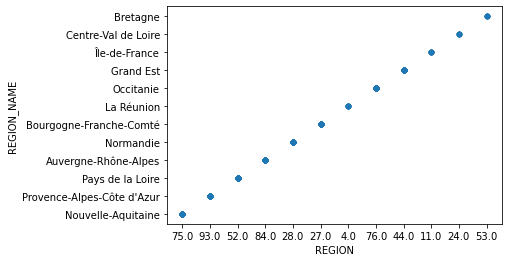

In [40]:
df_fusion1.plot.scatter(x="REGION", y="REGION_NAME")

In [41]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

In [42]:
df.groupby("TYPOLOGIE ÉTABLISSEMENT").count()

,DATE DE CLASSEMENT,CLASSEMENT,CATÉGORIE,MENTION (villages de vacances),NOM COMMERCIAL,ADRESSE,CODE POSTAL,COMMUNE,SITE INTERNET,TYPE DE SÉJOUR,CAPACITÉ D'ACCUEIL (PERSONNES),NOMBRE DE CHAMBRES,NOMBRE D'EMPLACEMENTS,NOMBRE D'UNITES D'HABITATION (résidences de tourisme),NOMBRE DE LOGEMENTS (villages de vacances),DEPARTEMENT,code_postal
TYPOLOGIE ÉTABLISSEMENT,,,,,,,,,,,,,,,,,
CAMPING,5988,5988,5988,5988,5988,5988,5988,5988,5988,5988,5988,5988,5988,5988,5988,5988,5988
HÔTEL DE TOURISME,13081,13081,13081,13081,13081,13081,13081,13081,13081,13081,13081,13081,13081,13081,13081,13081,13081
PARC RÉSIDENTIEL DE LOISIRS,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146
RÉSIDENCE DE TOURISME,1549,1549,1549,1549,1549,1549,1549,1549,1549,1549,1549,1549,1549,1549,1549,1549,1549
VILLAGE DE VACANCES,540,540,540,540,540,540,540,540,540,540,540,540,540,540,540,540,540


In [43]:
df.dropna(subset=["TYPOLOGIE ÉTABLISSEMENT"], inplace=True)

In [44]:
df.dropna(subset=["code_postal"], inplace=True)

In [48]:
def prepare_data(s):
    return pd.get_dummies(s)

In [49]:
prepare_data(df["TYPOLOGIE ÉTABLISSEMENT"])

,CAMPING,HÔTEL DE TOURISME,PARC RÉSIDENTIEL DE LOISIRS,RÉSIDENCE DE TOURISME,VILLAGE DE VACANCES
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
21321,1,0,0,0,0
21322,1,0,0,0,0
21323,1,0,0,0,0
21324,0,1,0,0,0


In [45]:
df["variable_expliquee"] = df["CLASSEMENT"].apply(lambda x: x[0])
# pour ma variable expliquée qui est le nombre d'étoiles d'un établissement je
# récupère le premier élément qui est justement le chiffre qui représente le nombre d'étoiles
# de l'établisement

In [46]:
df.dropna(subset=["variable_expliquee"], inplace=True)

df['variable_expliquee'] = df['variable_expliquee'].str.replace(r'\D', "NULL")
df['CODE POSTAL'] = df['CODE POSTAL'].str.replace(r'\D', "NULL")

pd.to_numeric(df["variable_expliquee"], errors = 'coerce')
variable_expliquee_propre = [float(x) for x in variable_expliquee if x != '-']

df.dropna(subset=["code_postal"], inplace = True)
pd.to_numeric(df["code_postal"], errors='coerce')

In [54]:
df["code_postal"] = pd.to_numeric(df["code_postal"], errors = 'coerce')

In [55]:
df["variable_expliquee"] = pd.to_numeric(df["variable_expliquee"], errors = 'coerce')

In [96]:
variable_ = df["code_postal"].to_list()

In [97]:
variable_

[76600.0,
 33440.0,
 67140.0,
 67400.0,
 75012.0,
 75014.0,
 75009.0,
 75010.0,
 13300.0,
 74290.0,
 82000.0,
 24200.0,
 6160.0,
 75017.0,
 33000.0,
 17000.0,
 49124.0,
 74600.0,
 74100.0,
 62217.0,
 33610.0,
 18000.0,
 14280.0,
 28630.0,
 36130.0,
 63100.0,
 57150.0,
 63500.0,
 72650.0,
 3410.0,
 62950.0,
 77700.0,
 77290.0,
 91100.0,
 86000.0,
 63200.0,
 42300.0,
 13300.0,
 31700.0,
 10120.0,
 26000.0,
 85210.0,
 37270.0,
 27300.0,
 92100.0,
 57050.0,
 17200.0,
 31110.0,
 70000.0,
 9000.0,
 85300.0,
 64640.0,
 64260.0,
 64780.0,
 64130.0,
 40170.0,
 40140.0,
 26340.0,
 81320.0,
 23320.0,
 40660.0,
 32320.0,
 40430.0,
 14450.0,
 12390.0,
 40150.0,
 29120.0,
 40600.0,
 33930.0,
 50190.0,
 40600.0,
 30630.0,
 40990.0,
 40600.0,
 42520.0,
 73340.0,
 29160.0,
 46700.0,
 13080.0,
 74540.0,
 75009.0,
 13001.0,
 75015.0,
 75014.0,
 75014.0,
 31000.0,
 75011.0,
 76000.0,
 74000.0,
 73120.0,
 68490.0,
 67190.0,
 31110.0,
 64400.0,
 64200.0,
 46500.0,
 73120.0,
 14800.0,
 74940.0,
 6200.0,
 430

In [117]:
variable_ = [x for x in variable_ if pd.isnull(x) == False]
print(variable_)

[76600.0, 33440.0, 67140.0, 67400.0, 75012.0, 75014.0, 75009.0, 75010.0, 13300.0, 74290.0, 82000.0, 24200.0, 6160.0, 75017.0, 33000.0, 17000.0, 49124.0, 74600.0, 74100.0, 62217.0, 33610.0, 18000.0, 14280.0, 28630.0, 36130.0, 63100.0, 57150.0, 63500.0, 72650.0, 3410.0, 62950.0, 77700.0, 77290.0, 91100.0, 86000.0, 63200.0, 42300.0, 13300.0, 31700.0, 10120.0, 26000.0, 85210.0, 37270.0, 27300.0, 92100.0, 57050.0, 17200.0, 31110.0, 70000.0, 9000.0, 85300.0, 64640.0, 64260.0, 64780.0, 64130.0, 40170.0, 40140.0, 26340.0, 81320.0, 23320.0, 40660.0, 32320.0, 40430.0, 14450.0, 12390.0, 40150.0, 29120.0, 40600.0, 33930.0, 50190.0, 40600.0, 30630.0, 40990.0, 40600.0, 42520.0, 73340.0, 29160.0, 46700.0, 13080.0, 74540.0, 75009.0, 13001.0, 75015.0, 75014.0, 75014.0, 31000.0, 75011.0, 76000.0, 74000.0, 73120.0, 68490.0, 67190.0, 31110.0, 64400.0, 64200.0, 46500.0, 73120.0, 14800.0, 74940.0, 6200.0, 43000.0, 35770.0, 13821.0, 33490.0, 6400.0, 33800.0, 29800.0, 68000.0, 13080.0, 33120.0, 18100.0, 51100

In [87]:
[i for i in variable_1 if i=="NaN"]

<ipython-input-87-05765fbe5353>:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  [i for i in variable_1 if i=="NaN"]


[]

In [94]:
variable_expliquee_1 = df["variable_expliquee"].to_list()

In [95]:
variable_expliquee_1

[4.0,
 2.0,
 4.0,
 4.0,
 3.0,
 3.0,
 3.0,
 4.0,
 4.0,
 4.0,
 4.0,
 2.0,
 4.0,
 4.0,
 2.0,
 2.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 2.0,
 3.0,
 3.0,
 2.0,
 3.0,
 3.0,
 2.0,
 3.0,
 3.0,
 2.0,
 3.0,
 3.0,
 3.0,
 3.0,
 2.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 2.0,
 3.0,
 3.0,
 2.0,
 2.0,
 2.0,
 2.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 2.0,
 2.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 1.0,
 2.0,
 3.0,
 5.0,
 3.0,
 3.0,
 3.0,
 4.0,
 3.0,
 2.0,
 5.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 2.0,
 2.0,
 2.0,
 3.0,
 2.0,
 3.0,
 3.0,
 3.0,
 2.0,
 4.0,
 2.0,
 3.0,
 3.0,
 3.0,
 4.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 2.0,
 3.0,
 3.0,
 2.0,
 4.0,
 3.0,
 3.0,
 3.0,
 2.0,
 2.0,
 3.0,
 3.0,
 3.0,
 3.0,
 4.0,
 3.0,
 2.0,
 4.0,
 1.0,
 2.0,
 2.0,
 1.0,
 3.0,
 3.0,
 2.0,
 2.0,
 2.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 4.0,
 2.0,
 3.0,
 3.0,
 3.0,
 3.0,
 2.0,
 3.0,
 3.0

In [115]:
new_variable_expliquee = [x for x in variable_expliquee_1 if pd.isnull(x) == False]
print(new_variable_expliquee)
variable_regressee = new_variable_expliquee.to_numpy()

[4.0, 2.0, 4.0, 4.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 2.0, 4.0, 4.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 2.0, 3.0, 3.0, 2.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 1.0, 2.0, 3.0, 5.0, 3.0, 3.0, 3.0, 4.0, 3.0, 2.0, 5.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 3.0, 2.0, 3.0, 3.0, 3.0, 2.0, 4.0, 2.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 2.0, 4.0, 3.0, 3.0, 3.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 2.0, 4.0, 1.0, 2.0, 2.0, 1.0, 3.0, 3.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 2.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 1.0, 3.0, 3.0, 4.0, 3.0, 3.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 2.0, 3.0, 2.0, 3.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 2.0, 3.0, 3.0, 2.0, 2.0, 3.0, 2.0, 2.0, 3.0, 2.0, 3.0, 3.0, 3.0, 2.0, 1.0, 3.0,

AttributeError: 'list' object has no attribute 'to_numpy'

In [113]:
variable_regresseur.reshape(-1,1)

NameError: name 'variable_regresseur' is not defined

In [107]:
X = variable_
Y = new_variable_expliquee
regr.fit(X, Y)

ValueError: Expected 2D array, got 1D array instead:
array=[76600. 33440. 67140. ... 49320. 17580. 40100.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
y = regr.predict(X)
y

In [ ]:
X = reshaped_arr_code_region
Y = df_ok["variable_expliquee"]
regr.fit(X, Y)

In [ ]:
z = regr.predict(X)
z

In [ ]:
import numpy as np 
df_ok["CAPACITÉ D'ACCUEIL (PERSONNES)"].replace("-",np.nan, inplace = True)

df_ok.dropna(subset=["CAPACITÉ D'ACCUEIL (PERSONNES)"], inplace = True)

In [ ]:
colonne = df_ok["CAPACITÉ D'ACCUEIL (PERSONNES)"]
colonne

In [ ]:
variable_explicative = pd.to_numeric(colonne)

In [ ]:
variable_explicative

In [ ]:
type(df_ok["code_region"])

In [ ]:
arr = df_ok["code_region"].values
# transformer l'object "series" en array

In [ ]:
# reshaping series 
reshaped_arr_code_region = arr.reshape((-1, 1))
  
# show 
reshaped_arr_code_region

In [87]:
type(prepare_data(df["TYPOLOGIE ÉTABLISSEMENT"]))

pandas.core.frame.DataFrame

In [ ]:
var_test = prepare_data(df_ok["TYPOLOGIE ÉTABLISSEMENT"]).to_numpy()
# permet de transformer un object "pandas.core.frame.DataFrame" en ARRAY

In [ ]:
var_test

In [ ]:
X = var_test
Y = df_ok["variable_expliquee"]
regr.fit(X, Y)

In [ ]:
result = regr.predict(X)
result

In [ ]:
X = [var_test, reshaped_arr_code_region]
Y = df_ok["variable_expliquee"]
regr.fit(X, Y)